*Created by Petteri Nevavuori.*

---

# Deep Learning seminaari

Kirjana Goodfellow et al.: Deep Learning (2016)

Otsikot seuraavat pääotsikoiden tasolla kirjaa, mutta alaotsikot eivät aina.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#14.-Autoencoders" data-toc-modified-id="14.-Autoencoders-1">14. Autoencoders</a></span><ul class="toc-item"><li><span><a href="#14.1-Undercomplete-Autoencoders" data-toc-modified-id="14.1-Undercomplete-Autoencoders-1.1">14.1 Undercomplete Autoencoders</a></span></li><li><span><a href="#14.2-Regularized-Autoencoders" data-toc-modified-id="14.2-Regularized-Autoencoders-1.2">14.2 Regularized Autoencoders</a></span><ul class="toc-item"><li><span><a href="#Sparse-Autoencoders" data-toc-modified-id="Sparse-Autoencoders-1.2.1">Sparse Autoencoders</a></span></li><li><span><a href="#Denoising-Autoencoders" data-toc-modified-id="Denoising-Autoencoders-1.2.2">Denoising Autoencoders</a></span></li><li><span><a href="#Regularizing-by-Penalizing-Derivatives" data-toc-modified-id="Regularizing-by-Penalizing-Derivatives-1.2.3">Regularizing by Penalizing Derivatives</a></span></li></ul></li><li><span><a href="#14.3-Representational-Power,-Layer-Size-and-Depth" data-toc-modified-id="14.3-Representational-Power,-Layer-Size-and-Depth-1.3">14.3 Representational Power, Layer Size and Depth</a></span></li><li><span><a href="#14.4-Stochastic-Encoders-and-Decoders" data-toc-modified-id="14.4-Stochastic-Encoders-and-Decoders-1.4">14.4 Stochastic Encoders and Decoders</a></span></li><li><span><a href="#14.5-Denoising-Autoencoders" data-toc-modified-id="14.5-Denoising-Autoencoders-1.5">14.5 Denoising Autoencoders</a></span><ul class="toc-item"><li><span><a href="#Estimating-the-Score" data-toc-modified-id="Estimating-the-Score-1.5.1">Estimating the Score</a></span><ul class="toc-item"><li><span><a href="#Historical-Perspective" data-toc-modified-id="Historical-Perspective-1.5.1.1">Historical Perspective</a></span></li></ul></li></ul></li><li><span><a href="#14.6-Learning-Manifolds-with-Autoencoders" data-toc-modified-id="14.6-Learning-Manifolds-with-Autoencoders-1.6">14.6 Learning Manifolds with Autoencoders</a></span></li><li><span><a href="#14.7-Contractive-Autoencoders" data-toc-modified-id="14.7-Contractive-Autoencoders-1.7">14.7 Contractive Autoencoders</a></span></li><li><span><a href="#14.8-Predictive-Sparse-Decomposition" data-toc-modified-id="14.8-Predictive-Sparse-Decomposition-1.8">14.8 Predictive Sparse Decomposition</a></span></li><li><span><a href="#14.9-Applications-of-Autoencoders" data-toc-modified-id="14.9-Applications-of-Autoencoders-1.9">14.9 Applications of Autoencoders</a></span></li></ul></li></ul></div>

## 14. Autoencoders

Autoenkooderit ovat neuroverkkoja, jotka pyrkivät oppimaan kopioimaan syötteitä niin hyvin, kuin mahdollista. Käytännössä siinä on piilokerros $h$, joka toimii syötteen ja ulostulon välisenä avaimena tai koodina. Verkko koostuukin kahdesta osasta, enkoodaavasta ja dekoodaavasta verkosta. Enkoodaava funktio $f(x)=h$ muuntaa syötteen piilokerrokseen ja dekoodaava funktio $g(h)=r$ taas pyrkii rakentamaan syötettä vastaavan signaalin piilokerroksesta.

Verkkojen käyttökelpoisuus tulee siitä, että niiden ei sallita päästää syötettä läpi vain sellaisenaan, milloin $g(f(x))=x$. Ne pakotetaan priorisoimaan syötteen eri osia estämällä niitä oppimasta kopiointia täydellisesti. Näin ne myös oppivat merkityksellisiä piirteitä datasta. Verkot ovat myötäkytkettyjen verkkojen erikoistapaus, minkä vuoksi ne voidaan kouluttaa aivan kuten mikä tahansa muukin perinteinen neuroverkko. 

Modernit autoenkooderit toimivat determinististen funktioiden lisäksi myös stokastisten funktioiden kanssa. Verkkojen idea on sinänsä melko vanha, mutta generatiiviseen mallinnukseen käytettynä verkkojen käyttö- ja tutkimusmäärät ovat nousseet nykyisiin mittakaavoihin. Alussa verkkoja käytettiin piirravaruuden kaventamiseen tai piirteidein oppimiseen.

### 14.1 Undercomplete Autoencoders

Autoenkooderiverkkojen piilokerros $h$ on niiden kaikkein kiinnostavin osa. Aiemmin mainittu täydellisen oppimisen estäminen tapahtuu rajoittamalla piilokerroksen kokoa siten, että sen yksikköjen määrä on syötteen piirremäärää pienempi. Tällöin puhutaan vajaista (*undercomplete*) autoenkoodereista. Tällaisen verkon kouluttaminen pakottaa verkon oppimaan merkityksellisimmät datan piirteet.

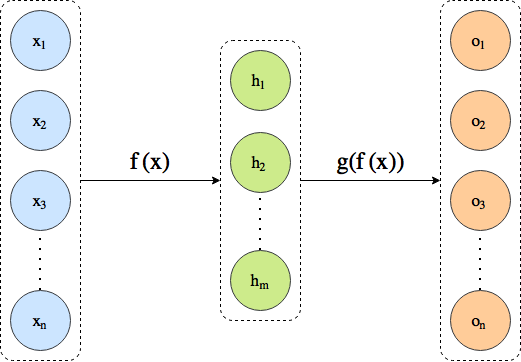

Autoenkooderit mittaavat virhettä niiden syötteen $x$ ja verkon ulostulon $g(f(x))$ välillä. Virhefunktio, joka rankaisee verkkoa syötteistä eroavista ulostuloista, on tällöin siis $ L(x, g(f(x))) $. Lineaarisena autoenkooderi oppii koulutuksen sivutuotteena PCA:n tapaisen signaalien aliavaruuden. Se on siis vähempipiirteinen avaruus, jossa monimutkainen signaali on hajoitettu muutamaksi merkitykselliseksi osasignaaliksi. 

Mikäli dekooderi on epälineaarinen, kykenevät verkot oppimaan vieläkin tehokkammaan yleistyksen PCA:sta. Liikaa kapasiteettia verkolla ei kuitenkaan saa olla, sillä muutoin se oppii kopioinnin liian hyvin, eikä merkityksellisimpien piirteiden poiminta ole enää onnistunutta. 

### 14.2 Regularized Autoencoders

Kun piiloyksiköiden määrä vastaa tai ylittää syötteen piirteiden määrän, puhutaan ylitäydellisistä (*overcomplete*) autoenkoodereista. Tällöin verkon on kaikista kevyintä oppia vain suoraan kopioimaan syöte sellaisenaan, eikä merkityksellisien piirteiden oppimista tapahdu ollenkaan. Siksi pelkkä virhefunktion tarkkailu ei ole riittävää näiden verkkojen kanssa.

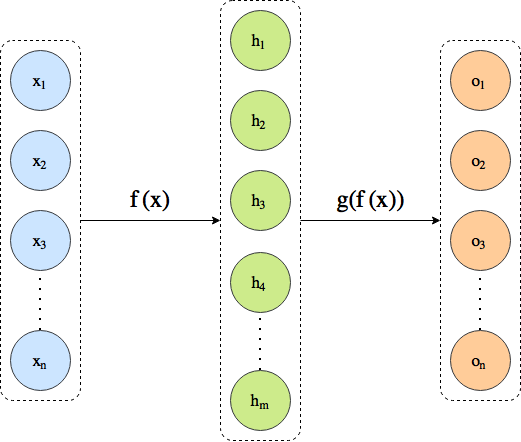

Regularisoimalla autoenkoodereita voidaan mallin kapasiteettia säätää mallinnettavaan ongelmaan sopivaksi. Regularisoinnilla mallin koulutukselle saadaan asetettua myös muita hyödyllisiä tavoitteita, kuin vain syötteen onnistunut kopiointi. Näitä ovat esimerkiksi robustisuus kohinalle ja opittujen piirteiden harvuus (*sparsity of representations*). Regularisoituna ylitäydellinenkin autoenkooderi voi oppia datasta jotain merkityksellistä.

Melkein mikä tahansa datapohjainen piilomuuttujia hyödyntävä generatiivinen malli voidaan nähdä jonkinasteiesena autoenkooderina. Kirjan myöhemmissä luvuissa esitellään kaksi tällaista mallia, muuttuva (*variational*) autoenkooderi ja genertiivinen stokastinen verkko (*generative stochastic network*). Nämä oppivat luontaisesti hyödyllisen korkeakapasiteettisen ja ylitäydellisen syötteen enkoodauksen ilman regularisoinnin tarvetta.


#### Sparse Autoencoders

Harva autoenkooderi on yksinkertaisuudessaan autoenkooderi, jonka piilokerrokselle $h$ asetataan harvuutta suosiva regularisointisakko. Tällaisen verkon kohdefunktio muistuttaa paljon regularisoidun myötäkytketyn verkon kohdefunktiota. Kaavana se voidaan ilmaista muodossa

$$L(x, g(f(x)))+\Omega(h),$$

jossa $\Omega(h)$ on piilokerroksen regularisointifunktio.

Harvuutta suosiva regularisointifunktio eroaa kuitenkin esimerkiksi $L^2$-normisakosta. Perinteisesti pyritään maksimoimaan $p(\theta \mid x)=\log{p(x \mid \theta)} + \log{p(\theta)}$, missä parametreihin kohdistuu erillinen oletus jakaumasta. Autoenkooderin regularisointi riippuu kuitenkin datasta eikä parametreista. Harvan autoenkooderin regularisointi voidaankin ennemmin nähdä piilomuuttujia sisältävän generatiivisen mallin kouluttamisena.

Autoenkooderin harvuus on samankaltaista edellisen luvun harvan koodauksen kanssa. Harvan koodauksen todennäköisimmän $h$:n optimoinnin sijasta harvan autoenkooderin kanssa $h$ opitaan enkooderin ulostulona. Harvan koodauksen tavoin autoenkooderin piiloyksiköiden jakaumalla voidaan saada jo harvoja piiloyksiköitä ja piirteitä. Kuten harvassa koodauksessa, todellisesti nolla-arvoisia piirteitä ei kuitenkaan ole monia.

Harvuus on autoenkooderien tapauksessa kuitenkin seurausta kohdefunktiossa käytetystä piiloyksiköiden regularisointiparametrista. Koska kohdefunktiota pyritään minimoimaan, mallin kohdefunktio paranee, kun piilokerrokset yksiköt ovat harvempia eli harvemmin aktiivisia tai pieniarvoisia. Näin koulutettu malli on myös vain datantuottoprosessia approksimoiva, eikä suoraan $x \to x$ kopioiva. Näin koulutetun verkon piiloyksiköt toimivat syötettä selittävinä.

#### Denoising Autoencoders

Regularisoinnin sijasta autoenkooderien kouluttumiseen voidaan vaikuttaa myös virhefunktion suunnittelulla. Perinteisesti virhefunktio lasketaan syötteen $x$ ja tuotteen $g(f(x))$ välillä. Vaihtoehtoisesti malli voidaan kouluttaa käyttämällä syötteenä kohinaista syötettä $\tilde{x}$, jolloin virhfunktioksi muodostuu

$$L(x, g(f(\tilde{x}))).$$

Näin koulutettua verkkoa kutsutaan kohinaa poistavaksi autoenkooderiksi (*denoising autoencoder*). Pelkän syötteen kopioinnin oppimisen sijasta verkon on myös opittava poistamaan lisätty kohina. Näin malli oppii paremmin syötedatan jakauman rakenteen ja samalla merkittävät piirteet ikäänkuin sivutuotteena. Nämä verkot esitellään tarkemmin aliluvussa 14.5.

#### Regularizing by Penalizing Derivatives

Kun regularisointitermiin lisätään piilokerroksen $h$ lisäksi myös syöte $x$, saadaan malli oppimaan syötteen muutosnopeuteen mukautuvaksi. Tällaista autoenkooderia kutsutaan supistuvaksi (*contractive*). Tämäkin malli esitellään tarkemmin myöhemmin.

### 14.3 Representational Power, Layer Size and Depth

Usein autoenkooderit koulutetaan matalina, eli yhdellä enkooderi- ja yhdellä dekooderikerroksella. Syvyyden lisäämisellä on kuitenkin etuja, samaan tapaan kuin perinteisillä myötäkytketyillä verkoilla. Koska autoenkooderin osaverkot ovat omia verkkojaan, kumpikin osaverkoista hyötyy syvyyden lisäyksestä erikseen.

Syvyyden lisäys voi ensinnäkin helpottaa verkon koulutuksen laskennallisia vaatimuksia helpottamalla datantuottoprosessin kasvatetun kapasiteetin seurauksena. Samoin kasvatettu syvyys vähentää koulutusdatasetin minimikokovaatimusta. Syvät autoenkooderit pystyvät myös puristamaan eli enkoodaamaan datantuottprosessin tehokkaammin. Näiden verkkojen koulutus tapahtuu usein esikouluttamalla matalampia verkkoja.

### 14.4 Stochastic Encoders and Decoders

Autoenkooderien ollessa pohjimmiltaan vain myötäkytettyjä verkkoja voidaan niiden kanssa käyttää jo tutuksi tulleita neuroni- ja kohdefunktiotyyppejä. Erona perinteisiin myötäkytkettyihin verkkoihin on, että koulutuksen kohdearvona $y$ käytetäänkin syötettä $x$. Tällöin koulutuksen tavoitteena on maksimoida todennäköisyys $p_{decoder}(x \mid h)$, eli pienentää verkon piilokoodia (*hidden code*) kopiointiin hyödyntävän dekooderiverkon virhettä.

Itse kohdefunktio määräytyy syötteen arvojen ja niiden jakauman perusteella. Tyypillistä on joka tapauksessa, että arvoja kohdellaan piilokoodista $h$ ehdollisesti riippumattomina, joskin poikkeuksiakin löytyy, kuten esim. yhdistelmätodennäköisyysulostulot (*mixture density outputs*). Tällöin ulostuloja mallinnetaan käyttäen korrelaatioita apuna.

Räikein autoenkooderien ero perinteisiin myötäkytkettyihin verkkoihin on enkoodausfunktiossa $f(x)$, joka voidaan yleistää todennäköisyysjakaumaksi $p_{encoder}(h \mid x)$. Tällöin autoenkooderimallin $p_{model}(h, x)$ osat voidaan ilmaista siten, että stokastinen enkooderi on

$$p_{encoder}(h \mid x) = p_{model}(h \mid x)$$

ja stokastinen dekooderi vuorostaan

$$p_{decoder}(x \mid h) = p_{model}(x \mid h).$$

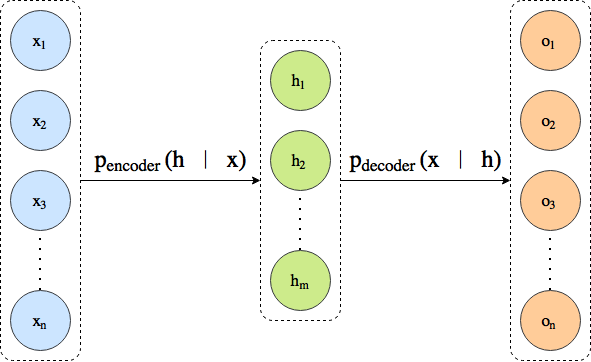

Vaikka yleisesti näitä kahta jakaumaa ei voida täysin varmasti esittää jakauman $p_{model}(h, x)$ yhdistelmäjakaumina, on kuitenkin tutkimuksissa osoitettu, että riittävän suurella kapasiteetilla koulutettu kohinaa poistava autoenkooderi mahdollistaa enkooderi- ja dekooderijakaumien yhteiskäytön ongelmattomasti.

### 14.5 Denoising Autoencoders

Kohinaa poistava autoenkooderi (*denoising autoencoder, DAE*) pyrkii tuottamaan alkuperäisiä näytteitä $x$ vastaavia tuotoksia saaden syötteeksi aina korruptoituneen näytteen $\tilde{x}$. Näyte korruptoidaan näytteille ehdollisella prosessilla $C(\tilde{x} \mid x)$. Tällöin autoenkooderi pakotetaan oppimaan alkuperäistä dataa mukaileva rekonstruktiojakauma (*reconstruction distribution*).

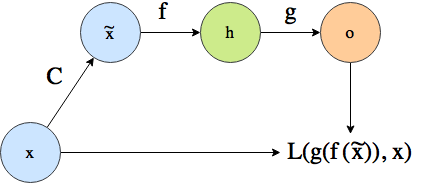

Kohinaa poistavan autoenkooderin koulutus etenee siten, että ensin näyte $x$ korruptoidaan. Korruptoitu näyte syötetään verkkoon, minkä jälkeen sillä tuotettua verkon ulostuloa verrataan alkuperäiseen eli korruptoimattomaan näytteeseen. Lähtökohtaisesti koulutus tapahtuu, kuten myötäkytketyissä verkoissa eli stokastisella *gradient descentillä*. 

#### Estimating the Score

Mallin syötettä vastaavan tuotteen todennäköisyysjakauman parantaminen ei ole ainut käyttökelpoinen suorituskykymittari. Mallia voidaan kouluttaa myös pisteyttämällä (*score*) mallin ulostulot suhteessa syötedatapisteisiin. Tämä on mahdollista oppimalla mallin gradienttikenttä (*gradient field*). Autoenkooderien tapauksessa riittää tieto siitä, että gradienttikentän $\Delta_x\log{p(x)}$ oppiminen on eräs tapa oppia itse datantuottoprosessi. Menetelmää avataan tarkemmin luvussa 18. 

Etenkin kohinaa poistavat autoenkooderit oppivat gradienttien vektorikentän. Kirjan kuva 14.4 avaa tätä jokseenkin:

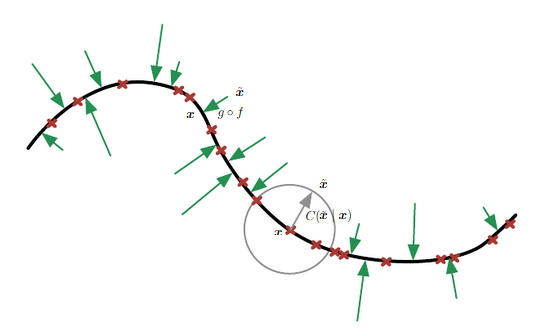

DAE:n koulutus pyrkii löytämään kohinan keskeltä suurpiirteisesti näytteiden oikean pinnan (musta viiva). Koulutettuna malli approksimoi kohinaisista näytteistä $\tilde{x}$ alkuperäisten näytteiden $x$ sijantia mallin oppimalla funktiolla $g(f(\tilde{x}))$ (vihreät nuolet). Laskemalla lopuksi näytekohtaiset vektorit $g(f(x))-x$ saadaan muodostettua vektorikenttä, josta itse mallin pisteytys on laskettavissa.

Tietyn tyyppisen DAE:n koulutus vastaa erään rajoitetun Boltzmannin koneen koulutusta, mikä esitellään tarkemmin luvussa 20. Kun tällainen malli koulutetaan kohinan poiston pisteytyksellä (*denoising score matching*), sen koulutus vastaa autoenkooderin koulutusta. Tällöin malli kykenee tavoittamaan datantuottoprosessin jakauman sumeasti. 

Pelkän datantuottoprosessin jakauman oppimisen lisäksi autoenkoodereita voidaan käyttää myös generatiivisina malleina. Tästä lisää luvussa 20.

##### Historical Perspective

Myötäkytkettyjen verkkojen käyttämistä kohinan poistoon on tutkittu jo 1980-luvun lopulla. Pelkän kohinan poiston ohella kohinaa poistavat autoenkooderit oppivat myös kuvaamaan itse dataa hyvin, mikä ajatuksena on jopa 20 vuotta alkuperäistä kohinan poistoa nuorempi.

### 14.6 Learning Manifolds with Autoencoders

Muiden koneoppimisalgoritmien tapaan myös autoenkoodereita voidaan tarkastella datan piileviä pintoja (*manifold*) oppivina menetelminä. Siinä missä jotkin menetelmät vain oppivat mukailemaan näitä pintoja, autoenkooderit pyrkivät oppimaan itse pintojen rakenteet. Tärkeä pintoihin liittyvä elementti on tangettitaso (*tangent plane*). Se määrittää datan muodostamassa pinnassa ne suunnat, joissa näytteiden arvoja tason määrittämillä rajoilla muuttamalla pysytään edelleen pinnassa.

Autoenkooderien koulutuksessa on kaksi toisilleen vastakkaista voimaa, datan kuvauksen tarkka oppiminen ja mallin rajoitteet, kuten regularisointi. Nämä yhdessä vaikuttavat, että malli oppii datasta jotain olennaista pelkän yksi-yhteen kopioinnin sijasta. Se kykenee tavoittamaan datan pinnan ja sen muutoksiin vaikuttavat tekijät samanaikaisesti jättämällä pinnan selkeästi (kohtisuoraan) poikkeavat muutokset huomiotta.

Autoenkooderit ovat datan piilevien pintojen oppimisessa käyttökelpoisempia, kuin muut pintoihin perustuvat piilokuvauksia oppivat menetelmät. Perinteisin ohjaamattomista menetelmistä on lähimpien naapurien graafi (*nearest neighbor graph*), jossa näytteet muodostavat solmuja ja nämä solmut linkitetään lähimpiin vastaaviin solmuihin. Näin saadaan muodostettua tietyssä mielessä koordinaastisto, jossa piilevä pinta voidaan esittää. 

Ongelmallista tällöin kuitenkin on, mikäli pinnat eivät ole tasaisia. Tällöin tarvitaan lisää näytteitä, joilla pintoja voidaan siloittaa. Samoin alueet, joille näytteitä ei ole, jäävät tavoittamatta. Pinnat voivat jäädä toisinsanoen puuttellisiksi tai liian karkeiksi.

### 14.7 Contractive Autoencoders

Supistuva autoenkooderi (*contractive autoencoder, CAE*) regularisoi suoraan mallin piilokerrosta $h$ siten, $x \to h$ derivaatat ovat mahdollisimman pieniä. Regularisointisakko on kaavana

$$\Omega (h) = \lambda \left\| \frac{\delta f(x)}{\delta x} \right\|^2_F,$$

mikä tarkoittaa käytännössä enkooderin painojen osaderivaattojen neliöiden summaa (Frobeniuksen normi) painotettuna kertoimella $\lambda$.

Kohinaa poistavan ja supistuvan autoenkooderin välillä on yhteys. Rajoitetun kohinan kanssa kohinaa poistavan mallin rekonstruktiovirhe $L(g(f(\tilde{x})),x)$ on saman suuntainen supistuvan verkon tapaan regularisoidun mallin kanssa. Kohinaa poistavat mallit oppivat toisin sanoen vastustamaan pieniä muutoksia, kuten supistuvat mallitkin. Paras tulos supistuvilla malleilla kuitenkin saadaan, mikäli regularisointi tehdään verkon enkooderiosaan dekooderin sijasta. 

Nimitys supistuva juontaa siitä, että vastustaessaan pieniä muutoksia malli käytännössä ryhmittelee syötteitä ja täten myös supistaa piirreavaruutta suhteessa syötteiden piirreavaruuteen. Tämä ryhmittely on paikallista, jolloin riittävän samankaltaiset muunnokset syöteestä $x$ kuvataan samaan pisteeseen $f(x)$. Tällöin on mahdollista, että syötteen $x$ kuvantaminen piilokerrokseen $h$ voi tuottaa alkuperäistä dataa suurempia etäisyyksiä:

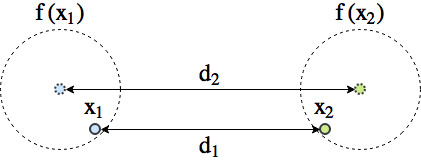

Supistumista voidaan katsoa myös lineaarioperaattoreiden näkökulmasta. Mikäli lineaarioperaation $ax$ normi jää pienemmäksi kuin yksi, se supistuu. Samaan tapaan ajateltuna supistuvan verkon regularisointi vaikuttaa enkooderiverkon Jakobiaanimatriisiin $J$ siten, että $Jx$:n normi jää aina supistuvaksi. Mikäli supistumiselle ei olisi vastakkaista voimaa eli rekonstruktiovirhettä, oppisi malli vain syöteagnostisia vakioarvoja. 

Yhdessä rekonstruktiovirheen kanssa malli pyrkii löytämään tasapainon kattavan kuvauksen ja robustien painojen välillä. Käytännössä supistuvan autoenkooderin regularisointi karsii ne muuttujat pois, jotka määrittävät vähiten datan tangenttipintaa. Tällöin jäljelle jäävät piirteet tai niiden yhdistelmät ovat niitä, joita yhdessä muuttamalla kyetään liikkumaan pitkin datan pintaa. Näin myös pinnan rakenne tulee opituksi.

Käytännössä esimerkiksi kuvien kanssa tangenttipinnalle merkityksillisimmät piirteet ovat niitä, joita muuttamalla muuttuu esimerkiksi kuvassa esiintyvien kasvojen asento. 

Syvempien arkkitehtuurien kanssa CAE:n käyttö on kuitenkin laskennallisesti kallista. Kuten muitakin syviä verkkoja, voidaan näitäkin kouluttaa osissa. Vaikka supistuvia autoenkoodereita voidaankin kouluttaa kerros kerrokselta siten, että lopputuloksenakin on syvä supistuva malli, ei näin koulutetun mallin suorituskyky vastaa kuitenkaan kerralla koulutettua syvää mallia. 

Toisaalta regularisointi voi johtaa huonoihin tuloksiin, ellei verkon dekooderiosaan kiinnitetä riittävää huomiota esimerkiksi painojen arvojen rajoittamisella. Toisin sanoen dekooderi voi huomiotta jätettynä oppia tekemään regularisoinnin vaikutuksen tyhjäksi oppimalla regularisoinnille käänteisen funktion.

### 14.8 Predictive Sparse Decomposition

Ennustava harva erittely (*predictive sparse decomposition*) on harvan koodauksen ja autoenkooderin yhdistävä hybridimalli, jossa enkooderi opetetaan ennustamaan harvan koodauksen tuotosta. Menetelmää on käytetty sekä kuvien että äänten osien tunnistuksessa. Koulutuksen aikana vuorotellaan mallin parametrien ja piilokoodin minimoinnin välillä, ja hyviä piilokerroksen arvoja saavutetaan jopa kymmenessä parametrien päivityksessä.

Menetelmä regularisoi dekooderia, jotta enkooderi pystyy tuottamaan sille hyödyllisempiä piirteitä. Menetelmä on esimerkki opitusta suurpiirteisestä päättelystä (*learned approximate inference*), jota avataan tarkemmin luvussa 19. Käytännössä mallin harvan koodauksen iteratiivista osaa käytetään vain koulutusvaiheessa, jolloin malli muodostuu tuotantoon viedesssä vain enkooderista ja dekooderista. 

Laskennallisen keveytensä vuoksi näitä malleja voidaan pinota useita ja käyttää esimerkiksi syvemmän verkon alustamiseen koulutettavaksi jollakin toisella kohdefunktiolla.

### 14.9 Applications of Autoencoders

Autoenkoodereita on käytetty onnistuneesti mm. piirreavaruuden kaventamiseen (*dimensionality reduction*) ja tiedon noutoon (*information retrieval*). Verrattuna paljon käytettyyn pääkomponenttianalyysiin syvillä autoenkoodereilla on saavutettu matalampia rekonstruktiovirheitä, joskin käytetyt verkot ovat olleet syviä ja osissa koulutettuja. Piirreavaruuden kaventamisella voidaan parantaa esimerkiksi luokittelutarkkuutta huomattavasti.

Tiedon noudolla taas tarkoitetaan kyselyä vastaavien tietojen noutoa vaikkapa tietokannasta. Tietyntyyppisissä matalapiirteisissä ympäristöissä hausta saadaan tehtyä erityisen tehokasta. Jos mallista saadaan täten koulutettua sekä piirreavaruutta kaventava että syötteet binäärimuotoon koodaava, voidaan tietokannan rivit tallettaa niitä parhaiten vastaavan binäärisen koodin kanssa. 

Tällöin hakua ei tarvitse tehdä rivi- ja sarakekohtaisesti, vaan suoraan vertaamalla haun ja rivien binäärikoodin kanssa. Samoin jokseenkin samankaltaisten rivien nouto onnistuu muuttamalla jotain binääriarvoja vastakkaisiksi. Tätä kutsutaan semanttiseksi tiivistämiseksi (*semantic hashing*). Binäärisiä arvoja saadaan autoenkooderista käyttämällä saturoituvia sigmoid-yksikköjä, jotka tuottavat joko ykkösiä tai nollia. Saturoituvuus saavutetaan syöttämällä kohinaa piilokerrokseen siten, että verkko kouluttuessaan joutuu painottamaan syötteitä yli saturoitumisrajan.